# Quantum Concepts and Qiskit

<p style="font-size: 1rem; color: #777; text-align: right;">(This notebook was prepared by: Mohamed Messaoud LOUAMRI)</p>
$\newcommand{\ket}[1]{|#1\rangle}$

Salam everyone,

In this first part, we are going to review some of the concepts that you (probably) saw this morning, we will discuss them a bit more, look at how to connect between the theoretical concepts and the code and answer some of your questions.

## Superposition and Measurements

### Quantum Foundation
Let's start with probably the most curious concept **superposition**.

Let's consider that the system that we studying is a classroom and it has 1 student. 

Classically, the student can be sitting in the first table or the second table or third table and etc. Let's choose the following notation: 
* $\ket{\psi} = \ket{1}$ to represent that the student is sitting at the first table.
* $\ket{\psi} = \ket{2}$ to represent the student is sitting at the second table.
* $\ket{\psi} = \ket{n}$ to represent the student is sitting at the n-th table.

At each point of time, the student position is clearly defined and the student cannot be sitting at two tables or more at the same time.

In quantum mechanics, however, it would perfectly acceptable to have a student sitting at two or more tables simultaneously. We could have:
* $\ket{\psi} = \ket{1}$ which means is sitting at the first table.
* $\ket{\psi} =  a\ket{1} + b\ket{2}$ which means that the student is sitting both at the first and the second table. 
* $\ket{\psi} =  a\ket{2} + b\ket{4} + c\ket{5}$ which means that the student is sitting both at the second, the fourth, and the fifth table.

_(we will ignore the meaning of the coefficients $a,b,c$ for now)_

Equivalently, instead of the Dirac notation ($\ket{n}$). We could describe the state of the student by vectors:

* $
\ket{\psi} = \begin{pmatrix}
1
\\
0 
\\
0 
\\
0 
\\ 
0
\end{pmatrix} \qquad \text{to represent that the student is sitting first table.}
$
* $
\ket{\psi} = \begin{pmatrix}
a
\\
b 
\\
0 
\\
0 
\\ 
0
\end{pmatrix} \qquad \text{which means that the student is sitting both at the first and the second table.}
$
* $
\ket{\psi} = \begin{pmatrix}
0
\\
a 
\\
0 
\\
b 
\\ 
c
\end{pmatrix} \qquad \text{which means that the student is sitting both at the second, the fourth, and the fifth table.}
$


The dimension of that vector represents the number of possible states that are available for the student, in the above example there are 5 tables which means that there is 5 states $\ket{n},  n \in \{1, 2, 3, 4, 5\}$.

A natural question to ask is about the meaning of a quantum system being in a superposition state. If the student is sitting both at table 1 and table 2 $\ket{\psi} = a \ket{1} + b\ket{2}$. Does it mean that we will see half of him at each table or we will see him twice (like cloned) or we will see something else??


The answer is that when we **LOOK at him**, we will see him either sitting at the first table or the second table. We don't **directly observe** the superposition, but how do we know that the superposition even existed **prior to our observation**, then? Well, this haunted and is still haunting theoretical physicists and philosophers, you can read more about it [here](https://en.wikipedia.org/wiki/Measurement_problem). During the workshop, we will stick to the following (conventionnal) [postulates of quantum mechanics](https://en.wikipedia.org/wiki/Mathematical_formulation_of_quantum_mechanics):

1. A quantum system can be in a superposition 
$$\ket{\psi} = a \ket{1} + b\ket{2}$$ 

2. A measurement perturbs the quantum system forcing it to go from a superposition state to definite state.

$$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{Measurement} \ket{\psi} = \ket{1}$$

    OR:

$$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{Measurement} \ket{\psi} = \ket{2}$$

3. The probability that a quantum system $\ket{\psi} = a \ket{1} + b\ket{2}$ is measured to be $\ket{1}$ is $P(\ket{1}) = a^* a = |a|^2$ and the probability that a quantum system is measured to be $\ket{2}$ is $P(\ket{2}) = b^* b = |b|^2$. ($a^*, b^*$ are the complex conjugates of $a, b$).

$$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{\text{Measurement with Probability }|a|^2} \ket{\psi} = \ket{1}$$

    OR:

$$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{\text{Measurement with Probability }|b|^2} \ket{\psi} = \ket{2}$$

**Terminology alert**: $a, b$ are called probability amplitudes because their squared module is the probability of the quantum system being measured in the state $\ket{1}, \ket{2}$ respectively.

### Quantum Computation

Because, we are interested in computation and because classical computers are built based on only two states (ON/OFF, TRUE/FALSE, 1/0) which you call a **bit**. We will pick our quantum system to have only two states $\ket{0}, \ket{1}$ and we will call it a **qubit**. 

**Note**: We can do classical computing using three states [**trits**](https://en.wiktionary.org/wiki/trit) (or more). Equivalently, we can also do quantum computing with more states [**Qudits**](https://en.wiktionary.org/wiki/qudit) or using a different paradigm: [**Qumodes**](https://strawberryfields.ai/photonics/concepts/photonics.html), [**Quantum Annealing**](https://docs.dwavesys.com/docs/latest/c_gs_2.html), etc. For simplicity, we will only focus on Qubits for the remaining of the workshop.

As stated above, we can represent the state of the Qubit either using the vector/matrix notation: 

$$\ket{\psi} = \begin{pmatrix}
a
\\
b 
\end{pmatrix}$$

Or using th Dirac notation:

$$\ket{\psi} = a \ket{0} + b \ket{1}$$ where $a,b$ are complex numbers.

We can rewrite the $a,b$ in the polar form:

$$\ket{\psi} = r_0 e^{i \phi_0} \ket{0} + r_1 e^{i \phi_1} \ket{1} = e^{i \phi_0} \times (r_0 \ket{0} + r_1 e^{i (\phi_1 - \phi_0)} \ket{1})$$

The $e^{i \phi_0}$ has no physical relevance and can be dropped and $(\phi_1 - \phi_0)$ can be redefined as $\phi$ for simplicity. 

We also know that as we are working with probabilities $P(\ket{0})$ and $P(\ket{1})$ should add up to $1$, which means that:

$$P(\ket{0}) + P(\ket{1}) = r_0^2 + r_1^2 \times e^{-i \phi} e^{i \phi} = r_0^2 + r_1^2 = 1$$

And we can introduce a new parameter $\theta/2$ (the factor 2 is for convinience) such that we can write:

$$r_0 = \cos\left(\frac{\theta}{2}\right) \qquad r_1 = \sin\left(\frac{\theta}{2}\right)$$


At the end, we can represent our qubit as:

$$\ket{\psi} = \cos\left(\frac{\theta}{2}\right) \; \ket{0} + \sin\left(\frac{\theta}{2}\right) e^{i \phi} \; \ket{1}$$

Where $\theta, \phi \in [0, 2\pi]$


The above notation allows us to have a very nice graphical way to represent our qubits: **The Bloch Sphere**.

**Examples**:

In [1]:
from qiskit.visualization import plot_bloch_vector
import numpy as np

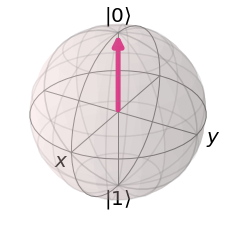

In [2]:
# Theta = 0
# Phi = 0
plot_bloch_vector([1, 0, 0], coord_type = "spherical", figsize = (3, 3))

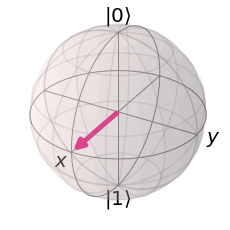

In [3]:
# Theta = Pi / 2
# Phi = 0
plot_bloch_vector([1, np.pi / 2, 0], coord_type = "spherical", figsize = (3, 3))

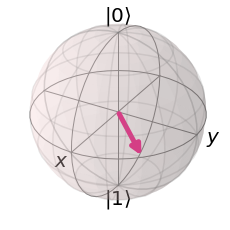

In [4]:
# Theta = Pi / 2
# Phi = Pi / 4
plot_bloch_vector([1, np.pi / 2, np.pi / 4], coord_type = "spherical", figsize = (3, 3))

Well, that was a lot of theory, now let's do some coding:

In [5]:
from qiskit import QuantumCircuit
import numpy as np

In [6]:
from helper import execute

In [7]:
from qiskit import Aer, transpile

In [8]:
qc = QuantumCircuit(1) # Create the circuit with 1 Qubit
theta = 0
phi = 0

a = np.cos(theta / 2)
b = np.sin(theta / 2) * np.exp(1j * phi)

qc.initialize([a, b], 0) # Initialize the qubit

qc.measure_all() # Measure all the qubits (in this case just 1)

execute(qc, shots = 1000) # Execute the circuit
# The shots argument indicates how many times to execute the circuit
# bear in mind that before making each shot the circuit is reset

{'0': 1000}

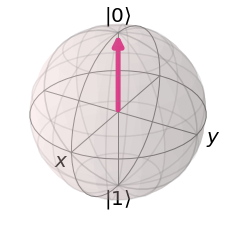

In [9]:
plot_bloch_vector([1, theta, phi], coord_type = "spherical", figsize = (3, 3))

**Task**: For each of the following examples, calculate the probabilties to find $0$, $1$ and see if the results are conform to your calculations.

In [10]:
qc = QuantumCircuit(1)
theta = np.pi
phi = 0

a = np.cos(theta / 2)
b = np.sin(theta / 2) * np.exp(1j * phi)
qc.initialize([a, b], 0)

qc.measure_all()


execute(qc, shots = 1000)

{'1': 1000}

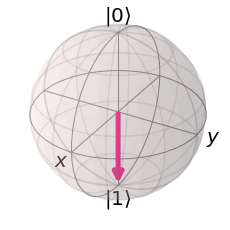

In [11]:
plot_bloch_vector([1, theta, phi], coord_type = "spherical", figsize = (3, 3))

In [12]:
qc = QuantumCircuit(1)
theta = np.pi / 2
phi = 0

a = np.cos(theta / 2)
b = np.sin(theta / 2) * np.exp(1j * phi)
qc.initialize([a, b], 0)

qc.measure_all()

execute(qc, shots = 1000)

{'0': 508, '1': 492}

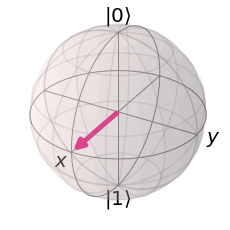

In [13]:
plot_bloch_vector([1, theta, phi], coord_type = "spherical", figsize = (3, 3))

**Tasks**: 
1. If you don't initialize the circuit using `qc.initialize` and run it directly, what do you observe?
2. Try to play with the $\phi$ parameter (and keep $\theta$ fixed) and see if how it impacts the measurements. Try to explain that theoretically (using probabilities).

In the code above, we defined our quantum circuit using the `QuantumCircuit` constructor and by providing the number of qubits for the system (in this case just 1 qubit).

We could also create our circuit using the following code:

In [18]:
from qiskit import QuantumRegister

In [19]:
qreg = QuantumRegister(1)

qc = QuantumCircuit(qreg)

qc.measure_all()

execute(qc, shots = 1000)

{'0': 1000}

We could also add classical bits to our circuit

In [20]:
from qiskit import ClassicalRegister

In [21]:
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)

qc = QuantumCircuit(qreg, creg)

qc.measure(0, 0) 
# This indicates that we want to measure the first qubit (idx: 0) 
# and write the result in the first (classical) bit (idx: 0) 

execute(qc, shots = 1000)

{'0': 1000}

**Task**: Try to confirm the postulate stated above: 

> 2. A measurement perturbs the quantum system forcing it to go from a superposition state to definite state.
> $$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{Measurement} \ket{\psi} = \ket{1}$$
>    OR:
> $$\ket{\psi} = a \ket{1} + b\ket{2} \xrightarrow{Measurement} \ket{\psi} = \ket{2}$$

1. Create a quantum circuit with 1 qubit and 4 classical bits. 
1. Put the qubit in a superposition state.
1. Measure the system a first time and write the result in the 1st classical bit.
1. Measure the system a second time and write the result in the 2nd classical bit.
1. Measure the system a third time and write the result in the 3rd classical bit.
1. Measure the system a fourth time and write the result in the 4th classical bit.
1. Execute the circuit and interpret the results.

## Gates

Now, that we got to know a little bit more about superposition, measurement, and qubits. Let's see how to interact with these qubits. In a real-world setup, we wouldn't just initialize our qubit and measure it. We would carry operation on it. These operations are known as quantum gates and they represent rotation in the Bloch sphere.

The gates are mathematically represented as matrices. 

For example the X-Gate (which is a $\pi$ rotation around the X-Axis) is represented by the following matrix:

$$X = \begin{pmatrix}
0 && 1 \\
1 && 0
\end{pmatrix}$$

And is "equivalent" to the [classical NOT gate](https://en.wikipedia.org/wiki/Inverter_(logic_gate)):

Let's take consider a qubit $\ket{\psi} = a \ket{0} + b \ket{1}$ if we apply the X gate on it:

$$
X\ket{\psi} = \begin{pmatrix}
0 && 1 \\
1 && 0
\end{pmatrix} \begin{pmatrix}
a \\
b
\end{pmatrix} = \begin{pmatrix}
b \\
a
\end{pmatrix} = b \ket{0} + a \ket{1}
$$

In [23]:
from helper import visualize_the_system

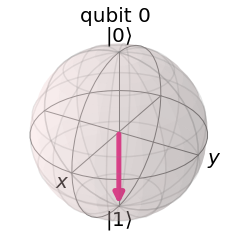

{'1': 1000}

In [24]:
qc = QuantumCircuit(1)
qc.x(0) # we are applying the x-gate on the first qubit (idx: 0)
visualize_the_system(qc)
qc.measure_all()

execute(qc, shots = 1000)

More gates can be found [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)

**Tasks**: using [the documentation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html), try to reach the following qubit states starting from the $\ket{0}$ (focus on the $H, Ry, Rx, Rz, X, Y, Z$ gates)

<div style="display: flex;">
<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/target_0.png" />
<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/target_1.png" />
<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/target_2.png" />
</div>

<div style="display: flex;">
<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/target_3.png" />
<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/target_4.png" />
</div>


## Multiple Qubits and Entanglement

Obviously, one qubit is not enough for computations. We need to work with multiple qubits. Let's see what more theoretical tools do we need to introduce for that and how to implement that using Qiskit. 

Let's say that we have 2 qubits. We, obviously, know that in the general case our measurement should give: $\ket{00}$ (both qubits were measured to be in the state 0), $\ket{01}$ (the FIRST qubit was measured to be in the state 1 and the SECOND was measured to be in the state 0), $\ket{10}$ and $\ket{11}$. We can represent this using a vector of dimension 4:

$$
\ket{00} = \begin{pmatrix}
1
\\
0 
\\
0 
\\
0 
\end{pmatrix}
$$


$$
\ket{01} = \begin{pmatrix}
0
\\
1 
\\
0 
\\
0 
\end{pmatrix}
$$

$$
a \ket{00}  + b \ket{01} + c \ket{10} = \begin{pmatrix}
a
\\
b 
\\
c
\\
0 
\end{pmatrix}
$$

As with one qubit, the probability to measure the system in the $\ket{00}$ is $P(\ket{00}) = |a|^2$ and etc.

**Task**: If you have a two qubits system, where the first qubit is in the state:

$$\ket{\psi_1} = a_1 \; \ket{0} + b_1 \; \ket{1}$$

And the second qubit is in the state:

$$\ket{\psi_2} = a_2 \; \ket{0} + b_2 \; \ket{1}$$

The state of the whole system would be in the form:

$$\ket{\psi} = a \ket{00} + b \ket{01} + c \ket{10} + d \ket{11}$$

Or equivalently,

$$\ket{\psi} = \begin{pmatrix}
a \\
b \\
c \\ 
d \\
\end{pmatrix}$$

Can you deduce the coefficient $a, b, c, d$? Can you find a general rule to find these coefficient for n-number of qubits? [Hint](https://en.wikipedia.org/wiki/Tensor_product)

**Task**: Given a composite system whose state is:

$$\ket{\psi} = \frac{1}{\sqrt{6}} \ket{00} + \frac{i}{\sqrt{3}} \ket{01} - \frac{1}{\sqrt{6}} \ket{10} - \frac{i}{\sqrt{3}} \ket{11}$$

Can you deduce $a_1, a_2, b_1, b_2$?
   

**Task**: Given a composite system whose state is:

$$\ket{\psi} =  \frac{1}{\sqrt{2}} (\ket{01} +  \ket{10})$$

Can you deduce $a_1, a_2, b_1, b_2$?
   

**Tasks**: 
We know that for a 2-qubit quantum system, we need 4 coefficients/numbers (floats) to represent it (the $a,b,c,d$).

1. How many coefficients (floats) do we need to represent a quantum system with 3 qubits?
1. How many coefficients (floats) do we need to represent a quantum system with n qubits? 
1. How much RAM do we need to store these numbers for a 2 qubits system?
1. How much RAM do we need to simulate a 3 qubit quantum computer?
1. How much RAM do we need to simulate a IBM Falcon (27 Qubits)?
1. How much RAM do we need to simulate a IBM Eagle (127 Qubits)?
1. How much RAM do we need to simulate a IBM Condor  (1121 Qubits)?
1. How many atoms are there in the observable universe?
1. How does the memory space (RAM usage) scale as a function of nb of qubits?

**Reference**: [link](http://www.eitc.org/research-opportunities/photos/the-byte-scale)
- $10^3$ -> Kilo
- $10^6$ -> Mega
- $10^9$ -> Giga
- $10^{12}$ -> Tera
- $10^{15}$ -> Peta
- $10^{18}$ -> Exa
- $10^{21}$ -> Zetta
- $10^{24}$ -> Yotta
- $10^{27}$ -> Xenottabyte
- $10^{30}$ -> Shilentnobyte

## Noise, NISQ, and QPU as coprocessors

The current problem with quantum computers is that they are very sensible to noise. They need either very low temperature -273C or to be in complete vaccuum. We also don't have enough control over the qubits yet. These are the challenges that scientists and engineers are tackling to make and scale quantum computers.

To show the impact of the noise on our calculations. Let's make the following simple quantum circuit: 

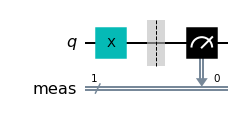

In [25]:
from qiskit.providers.fake_provider import FakeManila
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw(output = "mpl")

**Task**: Calculate the probability to measure $0,1$ for the above circuit.

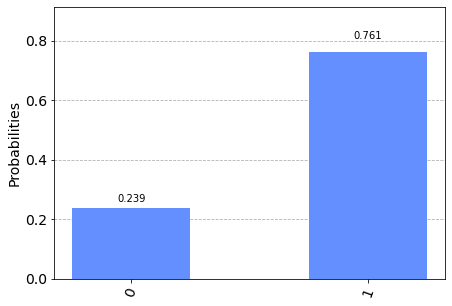

In [26]:
backend = FakeManila()
results = backend.run(transpile(qc, backend), shots = 1000).result()
counts = results.get_counts()
plot_histogram(counts)

And the more sophisticated our circuit is, the more noise it would have and the less our measurement output would have meaning. In the future, engineering improvement are expected to reduce the error rates and increase the number of available qubits and [Quantum Error Correction](https://en.wikipedia.org/wiki/Quantum_error_correction) is expected to get rid of the remaining noise. 


As of now, we are in the [NISQ](https://en.wikipedia.org/wiki/Noisy_intermediate-scale_quantum_era) era, where we can only use small circuits (both in the number of qubits and in the depth). 

One way to still take advantage of the current quantum computers, is to use them in conjunction with classical computers. An example of that is for [the famous Shor's factoring algorithm](https://www.youtube.com/watch?v=8EVQV5gY8O8&t=1288s&ab_channel=WOMANIUM), where we want to factor a number N into two prime numbers A,B:

<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/vqe.jpeg" width="70%" />

[Source](https://ionq.com/posts/january-05-2022-what-is-hybrid-quantum-computing)


<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/whurley_shor_1.png" width="70%" />

<img src="https://github.com/Constantine-Quantum-Tech/qff22-mml-workshop/raw/main/images/whurley_shor_2.png" width="70%" />

The algorithm has 5 steps but only the 4th step is hard to carry on a classical computer and "easy" on a quantum one. This means that we can just use a classical computers for all the other steps and use a quantum computer only for the 4th. In the case of Shor's algorithm, the 4th step is still hard to carry on current quantum computer due to noise and to the number of qubits required.

## RNG

Random number generation is an essential subroutine for many algorithms and applications. Our task is to find a procedure that generates uniform, unbiased, unreproducible random numbers with a sufficient rate. 

The problem might look simple. If you used `python`, you probably know that we have whole packages (`random`, `np.random`, ...) to generate random numbers. Let's take a look at `numpy`random number generator:

Let's see how to generate a random bitstring in python.

In [27]:
np.random.randint(0, 2, size = 10)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

That was easy as "py". But, how random are these numbers? The output above looks pretty random, so did we solve our problem already? Was it so trivial? No, numpy (and other prng) generate numbers which are approximately random using arithmetical methods. These numbers might be useful in a variety of applications but not in critical applications like security and science.

Let's try to understand how `numpy` generate its random numbers. For this, let's pick an [oversimplified algorithm](https://en.wikipedia.org/wiki/Pseudorandom_number_generator#Implementation).

In [28]:
def prng(seed, size):
    bitstring = np.empty(size, dtype=int)
    a, b = 17, 19 # a and b need to be prime numbers
    
    for i in range(size):
        num = seed * a
        bitstring[i] = np.round((num**3 % b) / b)
        seed += 1
        
    return bitstring

And generate a bitstring of length 95:

In [29]:
prng(42, 19 * 5)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1])

This looks pretty random doesn't it? However, it is **not**:

1. Everyone who knows your algorithm and knows the initial state (the seed) would be able to **reproduce** your results.

In [30]:
prng(42, 19 * 5) # same output

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1])

2. If you look closely you will see that their is a pattern that get's repeated:

In [31]:
np.reshape(_, (5, 19))

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]])

You can check that the same happens with numpy, let's pick the seed to be `12` and run `np.random.randint`. On my PC, I get: `array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])`. Try it on your PC, you would get the same results. This means that if their is a breach which would allow someone to know your `seed`. That person can easily reproduce all the random numbers you generate.

In [32]:
np.random.seed(12)
np.random.randint(0, 2, size = 10)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

Of course, there exists more advanced algorithm's to generate random numbers but generating truly random numbers using a classical computer or a classical system is impossible.

Your task would be to generate random numbers using a quantum computers :)